In [1]:
#
# Read data sets in to python
#


import pandas as pd

# Load the price and demand data
price_demand_data = pd.read_csv('price_and_demand.csv')

# Display the first few rows of the data
price_demand_data.head()


,State,Date_Time,Demand,Price,Type
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [2]:
# Load the weather data
weather_data = pd.read_csv('weather.csv')

# Display the first few rows of the data
weather_data.head()


,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022 0:00,8.5,13.3,3.0,NaN,NaN,SW,44.0,0.483333,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022 0:00,6.9,15.7,2.8,NaN,NaN,SSW,43.0,0.481250,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022 0:00,9.1,15.4,0.4,NaN,NaN,SSW,31.0,0.338194,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022 0:00,10.2,17.8,0.2,NaN,NaN,S,24.0,0.618056,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022 0:00,11.8,22.7,0.0,NaN,NaN,N,31.0,0.498611,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2


In [3]:
#
# Clean data, removed unnecesary columns, remove 2 columns and keep the 3 columns for analysis
#


# Select necessary columns
price_demand_data = price_demand_data[['Date_Time', 'Demand', 'Price']]

# Remove any rows with missing values, NaN, null or blank
price_demand_data = price_demand_data.dropna()

# Convert 'Date_Time' to datetime object
price_demand_data['Date_Time'] = pd.to_datetime(price_demand_data['Date_Time'], dayfirst=True)

# Save the cleaned data
price_demand_data.to_csv('price_and_demand_cleaned.csv', index=False)

price_demand_data.head()


,Date_Time,Demand,Price
0,2022-11-01 00:30:00,4178.18,8.94
1,2022-11-01 01:00:00,4086.02,0.14
2,2022-11-01 01:30:00,4033.37,0.02
3,2022-11-01 02:00:00,3985.64,0.00
4,2022-11-01 02:30:00,3885.64,0.02


In [4]:
#
# Clean data, removed unnecesary columns and keep 3 columns for analysis
#


# Select necessary columns
weather_data = weather_data[['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)']]

# Remove any rows with missing values, NaN, null or blank
weather_data = weather_data.dropna()

# Convert 'Date' to datetime object
weather_data['Date'] = pd.to_datetime(weather_data['Date'], dayfirst=True)

# Save the cleaned data
weather_data.to_csv('weather_cleaned.csv', index=False)

weather_data.head()


,Date,Minimum temperature (°C),Maximum temperature (°C)
0,2022-11-01,8.5,13.3
1,2022-11-02,6.9,15.7
2,2022-11-03,9.1,15.4
3,2022-11-04,10.2,17.8
4,2022-11-05,11.8,22.7


In [5]:
#
# Merge Cleaned data,use Date column as key/index
#

# Resample 'price_and_demand' data to daily frequency, taking the maximum demand value each day
daily_demand = price_demand_data.resample('D', on='Date_Time').max()

# Merge the energy data with the weather data
merged_data = pd.merge(daily_demand, weather_data, left_on=daily_demand.index.date, right_on=weather_data['Date'].dt.date, how='inner')

# Drop redundant 'Date' column
merged_data.drop(columns=['Date'], inplace=True)

# Rename the index to 'Date'
merged_data.index.name = 'Date'

merged_data.head()


,key_0,Demand,Price,Minimum temperature (°C),Maximum temperature (°C)
Date,,,,,
0,2022-11-01,5627.52,84.06,8.5,13.3
1,2022-11-02,6018.43,112.30,6.9,15.7
2,2022-11-03,6004.84,299.50,9.1,15.4
3,2022-11-04,5757.62,276.70,10.2,17.8
4,2022-11-05,4783.60,268.47,11.8,22.7


In [6]:
#
# using sklearn to model using decision tree classification
#

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Define the features and target
X = merged_data[['Minimum temperature (°C)', 'Maximum temperature (°C)']]
y = merged_data['Demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [7]:
#
# calculate Mean Absolute Error to determine accuracy of the model https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/
#

from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate the Mean Absolute Error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_dt


368.22342857142866

In [8]:
#
# using sklearn to model using K Nearest Neighbour classification
#

from sklearn.neighbors import KNeighborsRegressor

# Create a K-Nearest Neighbors Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate the Mean Absolute Error
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_knn


381.4686285714286

In [9]:
#
# using sklearn to model using Linear regression
#

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate the Mean Absolute Error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr


431.8165532811177

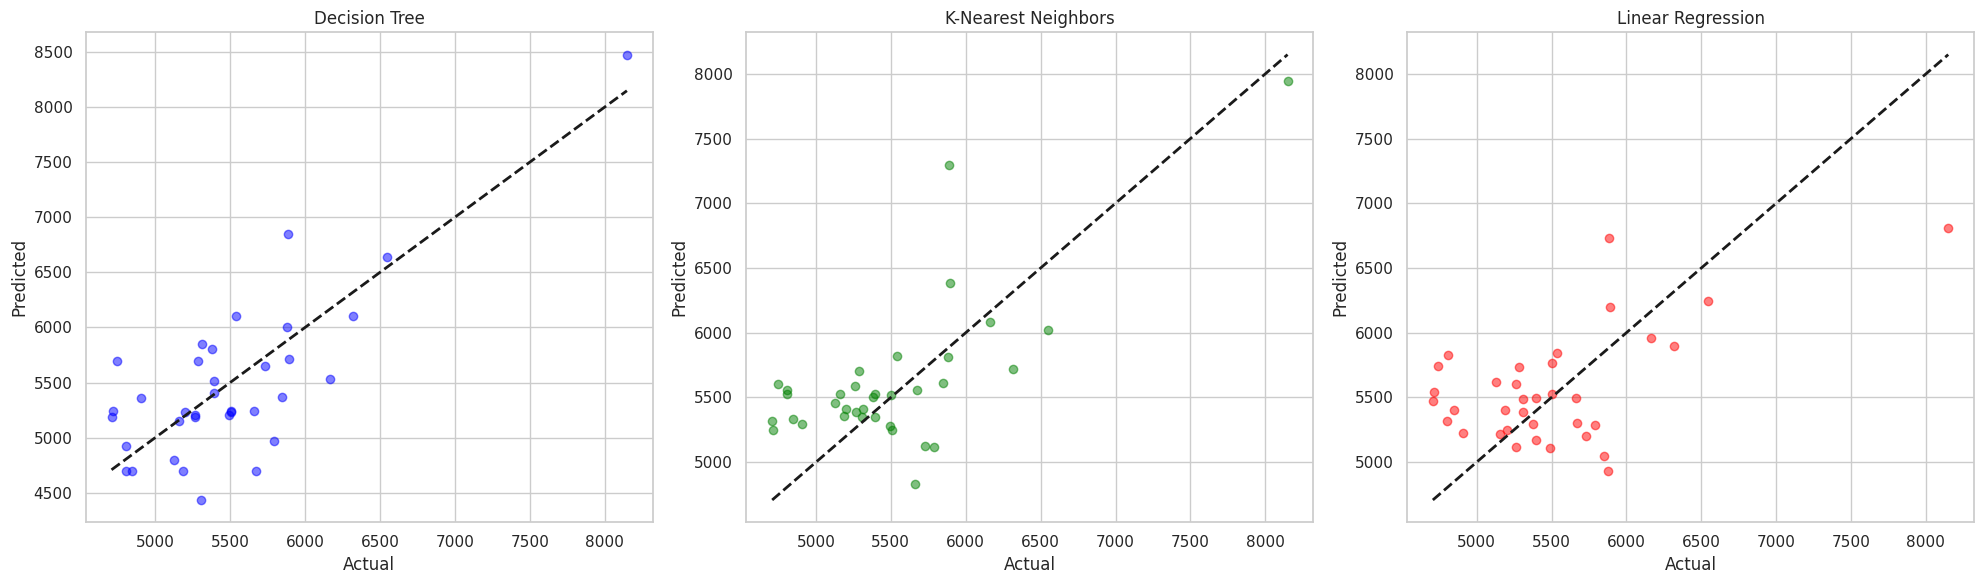

In [13]:
#
# plot each model using matplotlib for visual comparision
#


%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

# Scatter plot for Decision Tree predictions
axs[0].scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Decision Tree')

# Scatter plot for K-Nearest Neighbors predictions
axs[1].scatter(y_test, y_pred_knn, color='green', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('K-Nearest Neighbors')

# Scatter plot for Linear Regression predictions
axs[2].scatter(y_test, y_pred_lr, color='red', alpha=0.5)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')
axs[2].set_title('Linear Regression')

plt.tight_layout()
plt.show()


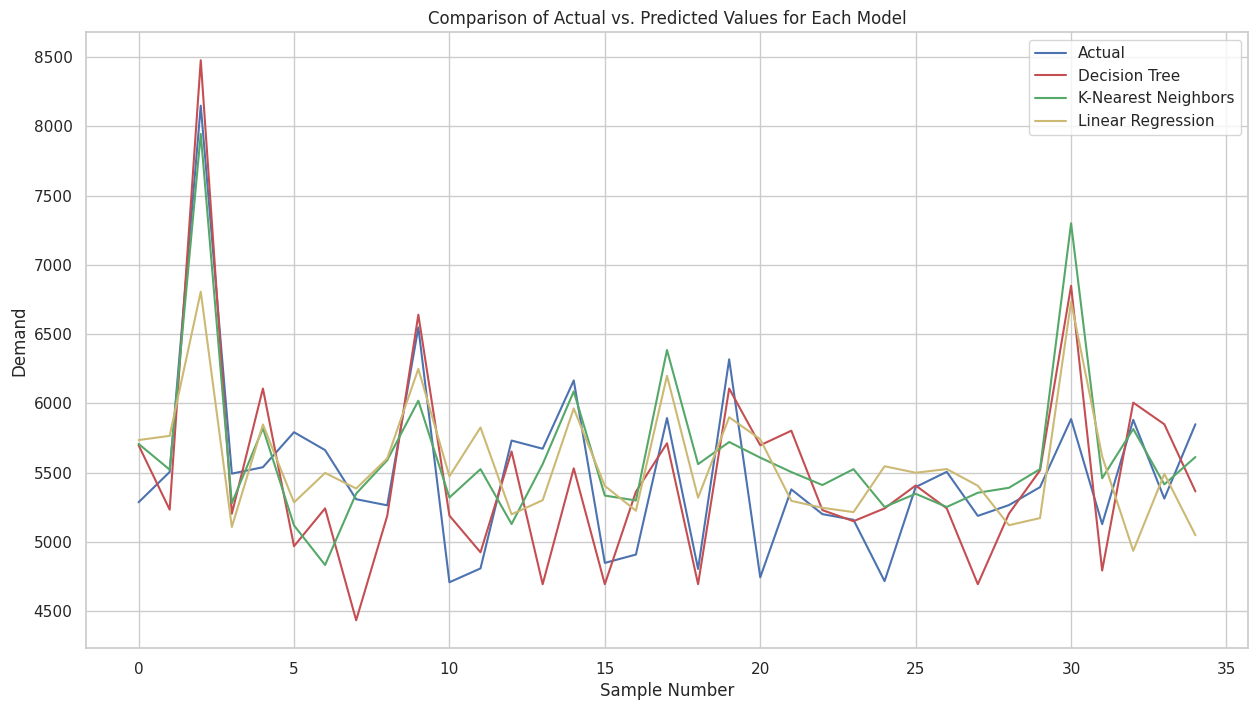

In [18]:
#
# plot each model in a single chart for visual comparision
#

# Adjust the sample size if necessary
sample_size = min(50, len(y_test))

# Select a sample from the test set
sample_test = y_test.sample(n=sample_size, random_state=42)

# Get the corresponding predictions
sample_pred_dt = [y_pred_dt[i] for i in sample_test.index]
sample_pred_knn = [y_pred_knn[i] for i in sample_test.index]
sample_pred_lr = [y_pred_lr[i] for i in sample_test.index]

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(sample_test.values, 'b-', label='Actual')
plt.plot(sample_pred_dt, 'r-', label='Decision Tree')
plt.plot(sample_pred_knn, 'g-', label='K-Nearest Neighbors')
plt.plot(sample_pred_lr, 'y-', label='Linear Regression')

plt.xlabel('Sample Number')
plt.ylabel('Demand')
plt.title('Comparison of Actual vs. Predicted Values for Each Model')

plt.legend()
plt.show()



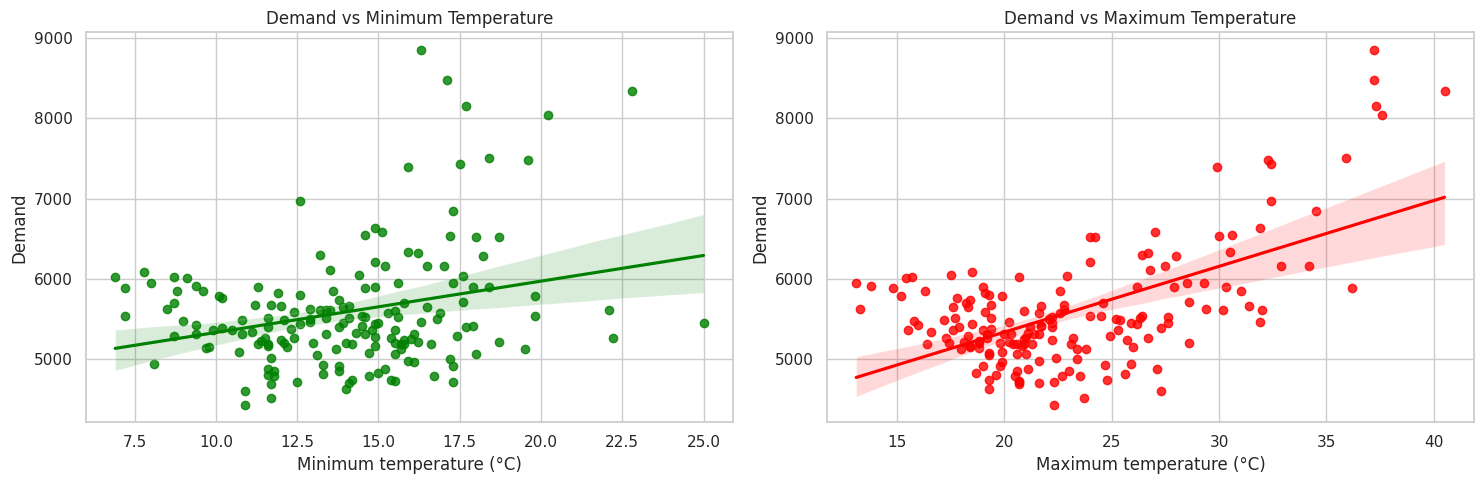

In [15]:
#
# plot the model based on selected decision tree classification
#

# Create subplots
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Plot relationships with regression lines
sns.regplot(x='Minimum temperature (°C)', y='Demand', data=merged_data, ax=axs[0], color='green')
sns.regplot(x='Maximum temperature (°C)', y='Demand', data=merged_data, ax=axs[1], color='red')

axs[0].set_title('Demand vs Minimum Temperature')
axs[1].set_title('Demand vs Maximum Temperature')
plt.tight_layout()
plt.show()

